In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
import math

In [2]:
 def ShowResizedIm(img,windowname,scale):
    cv2.namedWindow(windowname, cv2.WINDOW_NORMAL)        # Create window with freedom of dimensions
    height, width = img.shape[:2]   #get image dimension
    cv2.resizeWindow(windowname,int(width/scale) ,int(height/scale))                    # Resize image
    cv2.imshow(windowname, img)                            # Show image

In [34]:
#create list of y and x by counting element
#this cell take forever to run
def createHistXY(img):
    hist_list = [0] * 256
    x = []
    for i in img:
        for j in i:
            hist_list[j] = hist_list[j]+1
    for i in range(256):
        x.append(i)
    return x,hist_list

In [4]:
#import images from a folder into list
image_list = []
for filename in glob.glob('TU_pic/*.jpg'):
    image_list.append(filename)
    print(filename)

TU_pic\0645133-18878.jpg
TU_pic\0645133-18879.jpg
TU_pic\0645133-18880.jpg
TU_pic\0645133-18924.jpg
TU_pic\0645133-18925.jpg
TU_pic\0645133-18926.jpg
TU_pic\0645133-18927.jpg
TU_pic\0704716-18939.jpg
TU_pic\0704716-18940.jpg
TU_pic\0922091-18941.jpg
TU_pic\0922091-18942.jpg


In [35]:
#Import the jpg image

img_source = "LastSupper.jpg"
#img_source = "0618706-18808.jpg"

img = cv2.imread(img_source,0)

ShowResizedIm(img,"img",1)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [30]:
#Import the png image
img_source = "pyicon.png"
img1 = cv2.imread(img_source, cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

ShowResizedIm(img,"img",2)
cv2.waitKey(0)
cv2.destroyAllWindows()

<BarContainer object of 256 artists>

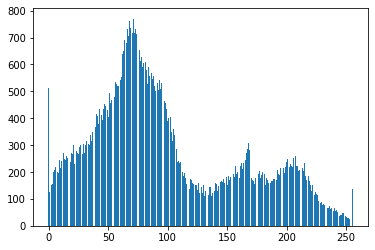

In [13]:
x,y=createHistXY(img)
#obvously this is a plot 
plt.bar(x,y,align='center')

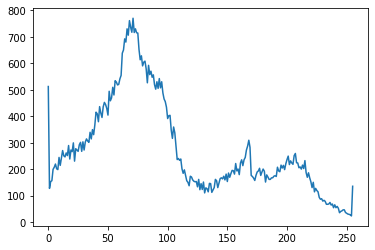

In [11]:
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

'''
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
'''
plt.plot(hist_full)
plt.show()

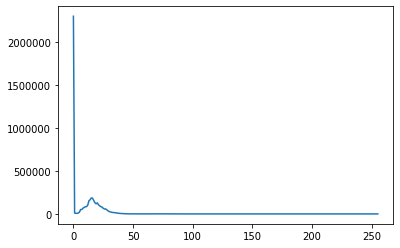

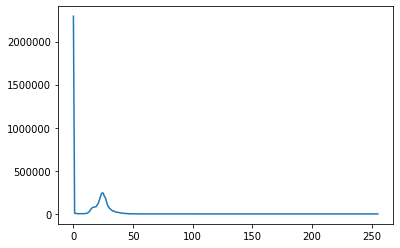

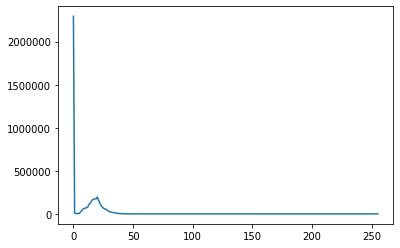

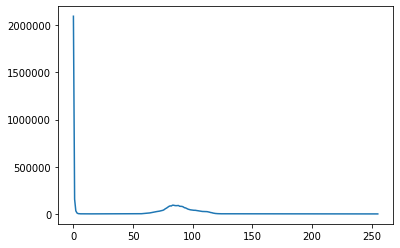

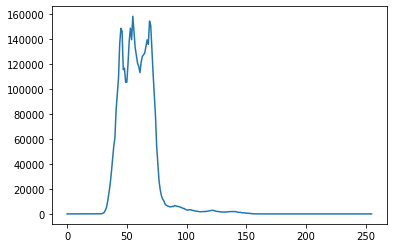

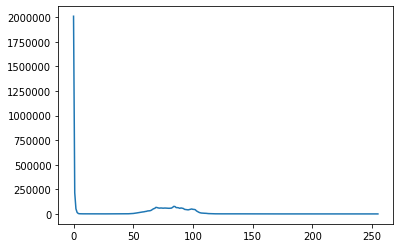

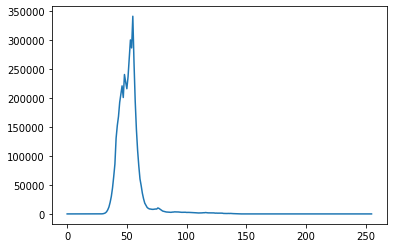

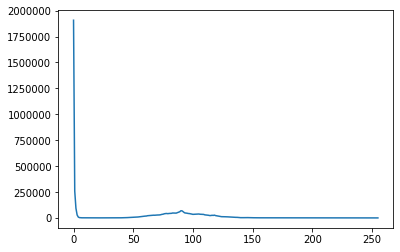

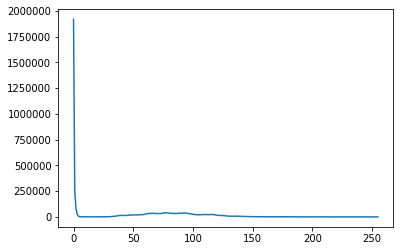

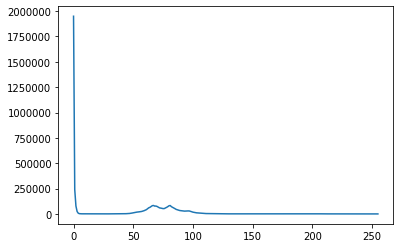

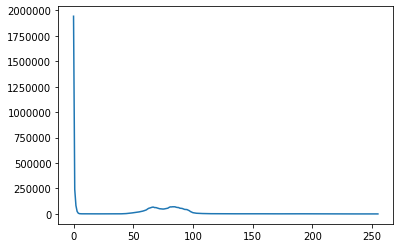

In [15]:
#Apply manual hist to image list
for i in image_list:
    img = cv2.imread(i,0)
    x,y=createHistXY(img)
    plt.figure()
    #plt.bar(x,y,align='center')
    plt.plot(y)

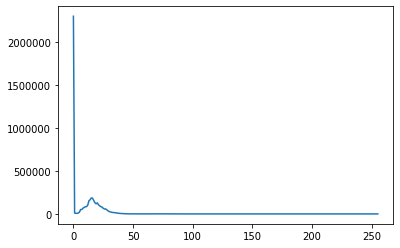

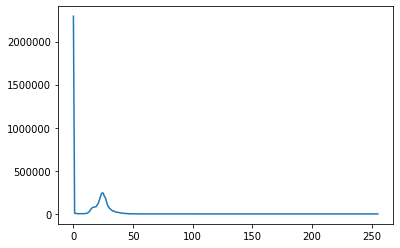

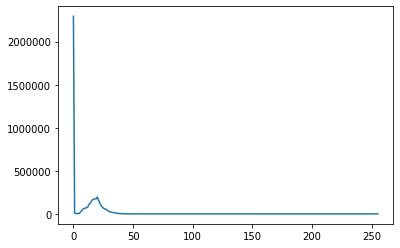

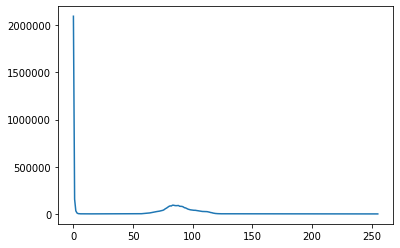

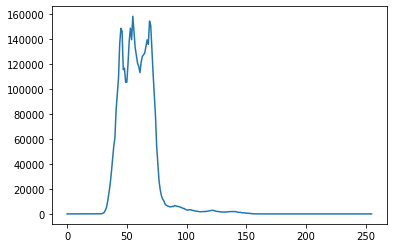

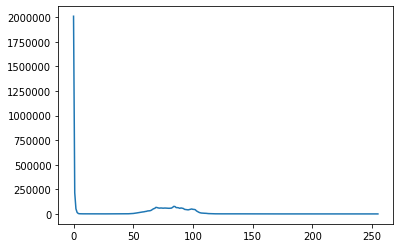

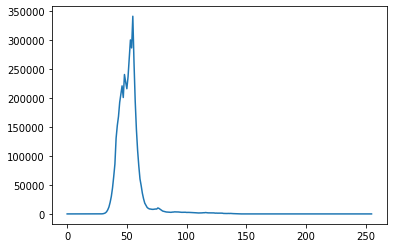

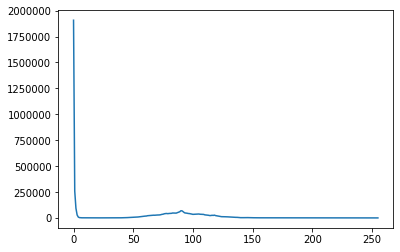

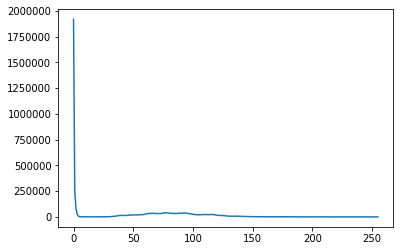

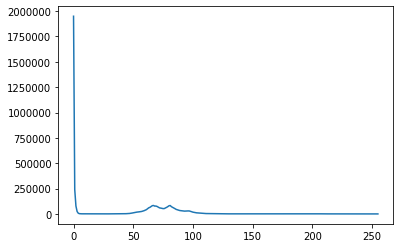

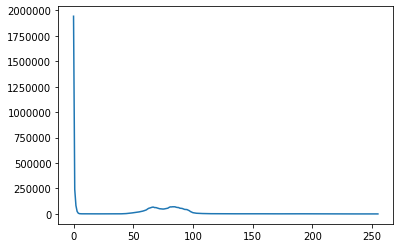

In [41]:
#Apply CV2 hist to image list
for i in image_list:
    img = cv2.imread(i,0)
    hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
    plt.figure()
    plt.plot(hist_full)


In [5]:
cv2.imwrite('image.jpg',img)

True